In [4]:
import numpy as np, curvedsky, plottools as pl, basic
from matplotlib.pyplot import *

In [5]:
Tcmb  = 2.726e6    # CMB temperature
lmax  = 4096       # maximum multipole of output normalization
rlmin, rlmax = 100, lmax  # reconstruction multipole range
sig   = 1.
ac2rad = np.pi/180./60.
L = np.linspace(0,lmax,lmax+1)

In [6]:
lcl = basic.aps.read_cambcls('../data/lensedcls.dat',2,lmax,4,bb=True)/Tcmb**2
lcl[2,:] *= 0.1 # delensing 
nl  = np.zeros((4,lmax+1))
nl[0,:] = (sig*ac2rad/Tcmb)**2
nl[1,:] = 2*nl[0,:]
nl[2,:] = 2*nl[0,:]
ocl = lcl + nl
ocl[0,3001:] = 1e30 # Tlmax = 3000

In [7]:
Al = {}
Al['TT'] = curvedsky.norm_tau.qtt(lmax,rlmin,rlmax,lcl[0,:],ocl[0,:])
Al['EB'] = curvedsky.norm_tau.qeb(lmax,rlmin,rlmax,lcl[1,:],ocl[1,:],ocl[2,:])

In [8]:
l, cl_R10 = (np.loadtxt('../data/tt_TH_R10.0_a0.0.dat',usecols=(0,1))).T

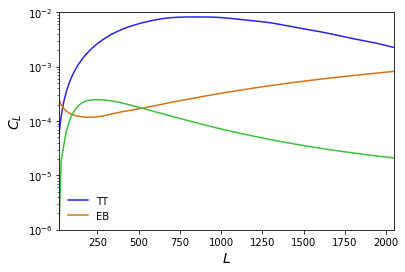

In [9]:
pl.plot_1dstyle(ylog=True,ymin=1e-6,ymax=1e-2)
plot(L,L**2*Al['TT']/np.sqrt(L+.5),label='TT')
plot(L,L**2*Al['EB']/np.sqrt(L+.5),label='EB')
plot(l,l**2*cl_R10)
legend()